## Implementation of Multi-class Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
# Load digit dataset

X, y = datasets.load_digits(return_X_y=True)
y = y.reshape((-1, 1))

print(X.shape, y.shape)

(1797, 64) (1797, 1)


digit = [0]


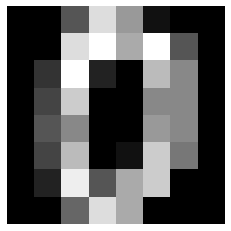

In [3]:
# Visualize the dataset

print('digit =', y[0])
plt.imshow(X[0].reshape((8, 8)), cmap='gray')
plt.axis('off')
plt.show()

In [4]:
X = np.hstack(( np.ones((X.shape[0], 1)), X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 65) (1437, 1)
(360, 65) (360, 1)


In [5]:
# Logistic Regression algorithm

def sigmoid(x):
    return 1.0/(1.0+np.exp(-1*x))

def hypothesis(X, theta):
    h = np.dot(X, theta)
    return sigmoid(h)

def loss(X, y, theta):
    h = hypothesis(X, theta)
    err = -((y * np.log2(h)) + ((1-y) * np.log2(1-h)))
    return h.mean()

def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.T, h-y)
    return grad / X.shape[0]

def grad_desc(X, y, l_rate=0.1, max_itr=500):
    theta = np.zeros((X.shape[1], 1))
    err_list = []
    
    for i in range(max_itr):
        err_list.append(loss(X, y, theta))
        
        grad = gradient(X, y, theta)
        theta = theta - l_rate*grad
        
    return theta, err_list

In [6]:
# Multi class classifier

def oneVsAll(X, y, l_rate=0.1, max_itr=500):
    num_labels = np.unique(y).shape[0]
    all_theta = np.zeros((num_labels, X.shape[1]))
    total_err = []
    
    for i in range(num_labels):
        new_y = (y == i).astype('int8')
        (theta, err) = grad_desc(X, new_y, l_rate, max_itr)
        all_theta[i, :] = theta.reshape((1, -1))
        total_err.append(err)
        
    total_err = np.sum(np.array(total_err), axis=0)
    return all_theta, total_err

def predictOneVsAll(X, theta):
    val = hypothesis(X, all_theta.T)
    return np.argmax(val, axis=1)

In [7]:
all_theta, err = oneVsAll(X_train, y_train)

c:\users\goura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':
c:\users\goura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


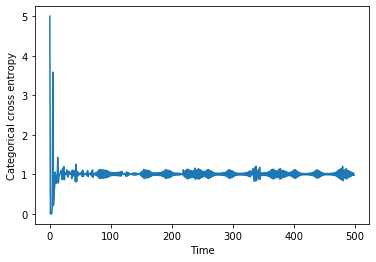

In [8]:
# Reduction of error over time

plt.plot(err)
plt.xlabel('Time')
plt.ylabel('Categorical cross entropy')
plt.show()

In [9]:
# Make predictions

y_pred = predictOneVsAll(X_test, all_theta)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.9638888888888889
